# Lending Club: Assessing Loan Default Risk

Context: Lending Club is a  P2P consumer lending business that offer alternative investment opportunities to the average investor. Investors can invest in debt instruments for either 36 or 60 months periods and generate historical average returns between 4-7%. We would like to assess the risks of these loans and classify good vs. bad loans.

Objective: 
- Predict and assess the level of risk or default of loans and loan applicants.
- Use machine learning to classify whether loan will be fully paid off. 
 
Good Loan: 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'

Bad Loan: 'Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default']

Measure of success:
We will measure success by whether our model is able to classify whether a future loan will result in default or not. 

Population: our process and model will be applied to consumer loans between 2007-2018, and we will only look at accepted loans

Timeframe: Lending Club has 12 years of accepted loan data from 2007 - 2018.

Column Categories: 

columns related to hardship: 'orig_projected_additional_accrued_interest','hardship_loan_status','hardship_dpd','hardship_reason','hardship_status',
'deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length',
'hardship_type','hardship_payoff_balance_amount','hardship_last_payment_amount','hardship_flag'

columns related to settlement: 'settlement_percentage','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_term', 'debt_settlement_flag'

columns related to secondary applicant: 'sec_app_mths_since_last_major_derog','sec_app_revol_util','revol_bal_joint','sec_app_chargeoff_within_12_mths',
'sec_app_num_rev_accts','sec_app_open_act_il','sec_app_open_acc','sec_app_mort_acc','sec_app_inq_last_6mths',
'sec_app_earliest_cr_line','sec_app_fico_range_high','sec_app_fico_range_low','sec_app_collections_12_mths_ex_med',
'verification_status_joint','dti_joint','annual_inc_joint', 'annual_inc_joint', 'dti_joint',

columns related to credit limits: 
'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_rev_hi_lim','il_util',

columns related to delinquency:
'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',  'mort_acc','bc_util',  'chargeoff_within_12_mths', 'delinq_amnt','inq_fi',  'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal','open_rv_12m',  'open_rv_24m', 'max_bal_bc','all_util', 'total_bal_il',
 'il_util', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
 
columns related to responsibility: 
'pct_tl_nvr_dlq', 'num_sats', 'num_bc_sats',  'bc_open_to_buy','all_util'

columns related to months of delinquency:
'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq','mths_since_rcnt_il',

columns related to application:
'policy_code', 'application_type'

columns related to applicant:
'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status',
 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog'




In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import _pickle as cPickle
import seaborn as sb
%matplotlib inline
pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns',999)


In [5]:
accept = pd.read_csv('accepted_2007_to_2018Q4.csv.gz')
accept.to_pickle('dfaccept')
df = pd.read_pickle('dfaccept')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df = pd.read_pickle('dfaccept')

#### Check missing Values

In [3]:
df.shape

(2260701, 151)

Text(0.5, 1.0, 'Percent missing per feature')

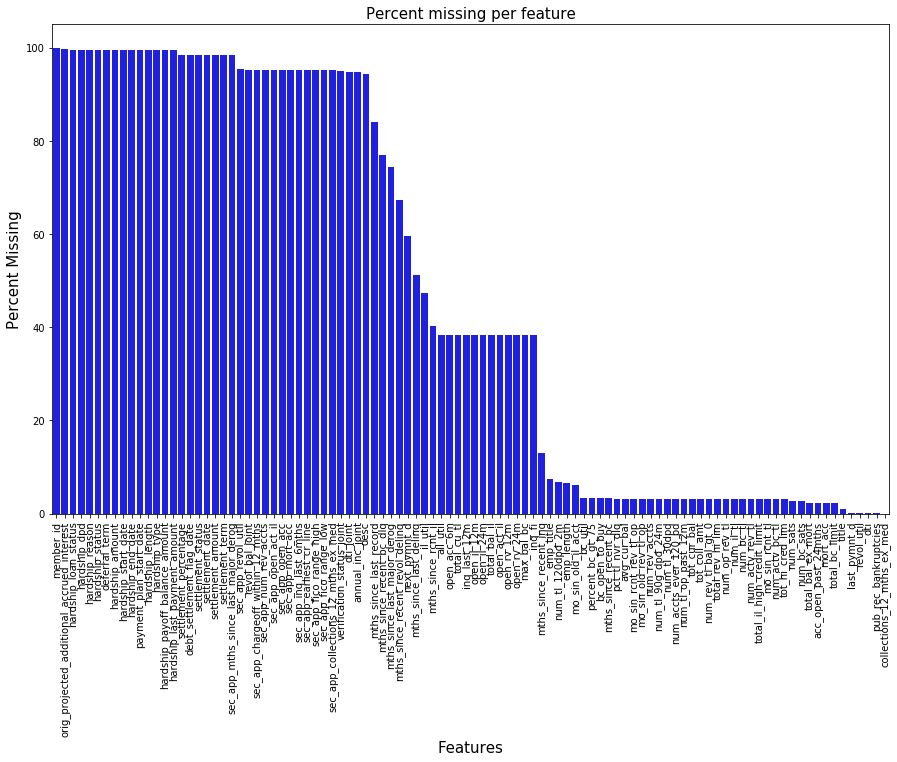

In [4]:
na_df = (df.isnull().sum() / len(df)) * 100
na_df = na_df.sort_values(ascending=False)[:100] # % missing for each feature in concatenated data


fig, ax = plt.subplots(figsize=(15, 9))
plt.xticks(rotation='90')
sb.barplot(x=na_df.index, y=na_df, color='blue')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent Missing', fontsize=15)
plt.title('Percent missing per feature', fontsize=15)

In [5]:
def missing_data(df):
    miss = np.sum(df.isnull(),axis =0)
    miss = miss.loc[miss>0].sort_values(ascending = False)
    missmean = np.mean(df.isnull(),axis =0)
    missmean = missmean.loc[missmean>0].sort_values(ascending = False)
    return pd.concat([miss.rename('count'),missmean.rename('mean')],axis = 1)

In [6]:
missing_data(df)

,count,mean
member_id,2260701,1.000000
orig_projected_additional_accrued_interest,2252050,0.996173
hardship_start_date,2249784,0.995171
hardship_type,2249784,0.995171
hardship_reason,2249784,0.995171
hardship_status,2249784,0.995171
deferral_term,2249784,0.995171
hardship_amount,2249784,0.995171
hardship_last_payment_amount,2249784,0.995171
hardship_payoff_balance_amount,2249784,0.995171


In [7]:
df.info(verbose=False, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


#### Drop/Remove Unnecessary Columns

In [8]:
#drop rows with all none values: 33 rows
index = df[df.funded_amnt.isnull()].index
df.drop(index, axis = 0, inplace = True)

#drop columns with 90% more missing values (columns are mainly related to hardship, settlement and secondary applicant)
#dtop columns with 38% more missing values: it will be tough to accurately impute
miss = missing_data(df)
misscolumns = miss.loc[miss['mean']>0.38].index
df.drop(misscolumns, axis =1, inplace = True)

#drop member_id and id, not needed for model. member_id was dropped already.
df.drop(['id'],axis = 1, inplace = True)

#drop features that were not available at the time of the loan application
df.drop(['out_prncp','out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int',
        'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
        'last_credit_pull_d','debt_settlement_flag'], axis=1, inplace=True) 

#drop features with only one value, 'hardship_type','deferral_term','hardship_length' were already dropped:
# for col in df.columns:
#     if df[col].nunique() == 1:
#         print(df[col].value_counts())
df.drop(['policy_code'], axis = 1, inplace = True)

#drop columns that will be unnecessary for model, mostly columns with diverse string values.
#It would be interesting to apply NLP techniques to group descriptions and perform semantic analysis. 
#'desc' already dropped
df.drop(['url','emp_title','zip_code','title'],axis =1, inplace = True)

#the date the loan was issued does not give us any information about the borrower. drop 'issue_d'
df.drop(['issue_d'], axis=1, inplace=True)

#### Pickle semi-processed dataframe for memory efficiency

In [10]:
df.to_pickle('dfaccept_semiprocessed2')
df = pd.read_pickle('dfaccept_semiprocessed2')

Text(0.5, 1.0, 'Percent missing per feature')

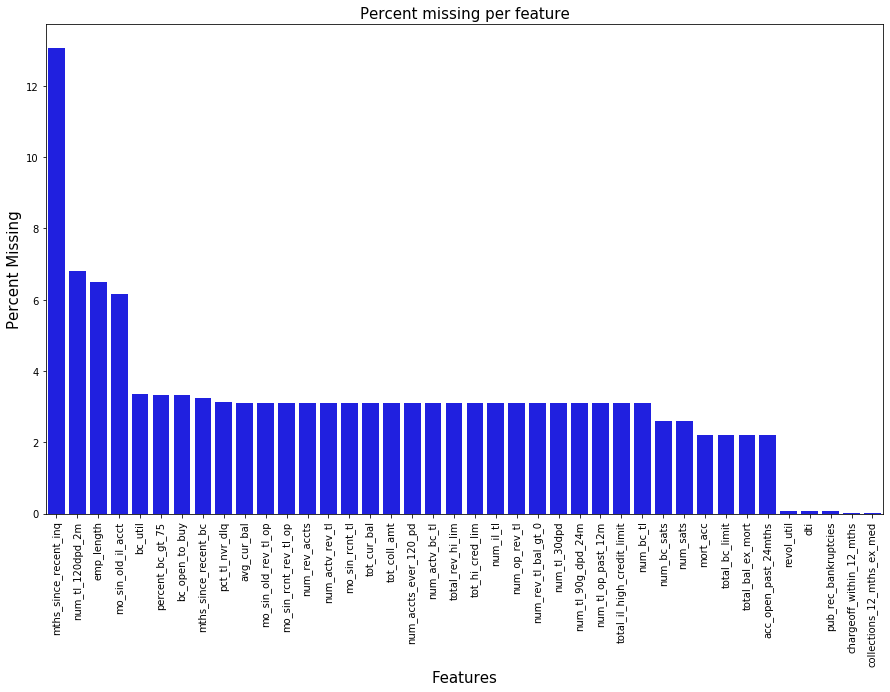

In [11]:
na_df = (df.isnull().sum() / len(df)) * 100
na_df = na_df.sort_values(ascending=False)[:40] # % missing for each feature in concatenated data


fig, ax = plt.subplots(figsize=(15, 9))
plt.xticks(rotation='90')
sb.barplot(x=na_df.index, y=na_df, color='blue')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent Missing', fontsize=15)
plt.title('Percent missing per feature', fontsize=15)

In [12]:
missing_data(df)

,count,mean
mths_since_recent_inq,295435,0.130685
num_tl_120dpd_2m,153657,0.067970
emp_length,146907,0.064984
mo_sin_old_il_acct,139071,0.061518
bc_util,76071,0.033650
percent_bc_gt_75,75379,0.033344
bc_open_to_buy,74935,0.033147
mths_since_recent_bc,73412,0.032474
pct_tl_nvr_dlq,70431,0.031155
avg_cur_bal,70346,0.031117


In [13]:
df.total_pymnt.head(5)

0     4421.723917
1    25679.660000
2    22705.924294
3    31464.010000
4    11740.500000
Name: total_pymnt, dtype: float64

In [14]:
#emp_length is of type object, we will convert this to integer
map = {"n/a":0, "< 1 ":1, "1 ":1, "2 ":2, "3 ":3, "4 ":4, "5 ":5, "6 ":6, "7 ":7, "8 ":8, "9 ":9, "10+ ":10}
df.emp_length = df.emp_length.str.replace("years","")
df.emp_length = df.emp_length.str.replace("year","")
df.emp_length.replace(map, inplace=True)

In [15]:
df.emp_length.value_counts()

10.0    748005
1.0     338391
2.0     203677
3.0     180753
5.0     139698
4.0     136605
6.0     102628
7.0      92695
8.0      91914
9.0      79395
Name: emp_length, dtype: int64

In [16]:
df.earliest_cr_line.head(5)

0    Aug-2003
1    Dec-1999
2    Aug-2000
3    Sep-2008
4    Jun-1998
Name: earliest_cr_line, dtype: object

In [17]:
#column 'earliest_cr_line' describes the date when first credit line was established. The longer the duration the more desirable
#the borrower. We will convert this measure to number of days since first credit line was established.
df['earliest_cr_line'] = df['earliest_cr_line'].apply(pd.to_datetime)
end = np.datetime64('2018-12', 'D')
df['earliest_cr_line'] = pd.Timestamp(end) - df['earliest_cr_line']
df['earliest_cr_line'] = df['earliest_cr_line'] / np.timedelta64(1, 'D')
df['earliest_cr_line'] = df.earliest_cr_line.replace("NaN", 0)

In [18]:
df.earliest_cr_line.head(5)

0    5601.0
1    6940.0
2    6696.0
3    3743.0
4    7488.0
Name: earliest_cr_line, dtype: float64

In [19]:
df.to_pickle('dfaccept_semiprocessed_after_crline2')
df = pd.read_pickle('dfaccept_semiprocessed_after_crline2')

In [20]:
df.shape

(2260668, 74)

In [21]:
df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

#### Classify dependent variable

In [22]:
df_negClass = df[df['loan_status'].isin(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'])]

df_posClass = df[df['loan_status'].isin(['Charged Off', 
                                         'Does not meet the credit policy. Status:Charged Off', 'Default'])]


df = pd.concat([df_negClass, df_posClass]).reset_index(drop = True)


In [23]:
df['loan_status_binary'] = (~df.loan_status.isin(['Fully Paid',\
                                                  'Does not meet the credit policy. Status:Fully Paid'])).astype(int)

In [24]:
df.loan_status_binary.value_counts()

0    1078739
1     269360
Name: loan_status_binary, dtype: int64

In [25]:
df.drop('loan_status', axis = 1, inplace = True)

After trimming the dataset, some columns only contain one value. Drop them. 

In [26]:
df.hardship_flag.value_counts()

N    1348099
Name: hardship_flag, dtype: int64

In [27]:
# for col in df.columns:
#     if df[col].nunique() == 1:
#         print(df[col].value_counts())

#column 'pymnt_plan' and 'hardship_flag' only contains values 'n', 'N', respectively
#after trimming the dataset to default vs. non-default. so we drop. 
df.drop(['pymnt_plan', 'hardship_flag'],axis =1 , inplace = True)


#### Drop columns to avoid multicollinearity

In [28]:
corrmatrix = df.corr().abs()
corrmatrix = corrmatrix.stack()
corrmatrix[(corrmatrix > 0.6) & (corrmatrix != 1.0)].sort_values(ascending=True)

mo_sin_rcnt_rev_tl_op       mths_since_recent_bc          0.603939
mths_since_recent_bc        mo_sin_rcnt_rev_tl_op         0.603939
mo_sin_rcnt_rev_tl_op       mo_sin_rcnt_tl                0.610661
mo_sin_rcnt_tl              mo_sin_rcnt_rev_tl_op         0.610661
num_bc_sats                 num_sats                      0.614226
num_sats                    num_bc_sats                   0.614226
open_acc                    num_bc_sats                   0.617806
num_bc_sats                 open_acc                      0.617806
num_op_rev_tl               num_bc_tl                     0.619581
num_bc_tl                   num_op_rev_tl                 0.619581
                            total_acc                     0.624052
total_acc                   num_bc_tl                     0.624052
num_rev_tl_bal_gt_0         num_bc_sats                   0.639916
num_bc_sats                 num_rev_tl_bal_gt_0           0.639916
num_sats                    num_rev_accts                 0.64

In [29]:
#drop 'funded_amnt_inv','funded_amnt'. these are unknown at the time of application. High multicollinearity with 'loan_amnt'
df.drop(['funded_amnt','funded_amnt_inv'], axis = 1, inplace = True)

#drop 'installment', a derivative of loan_amnt. high multicollinearity
df.drop(['installment'], axis =1 , inplace = True)

#drop 'num_actv_rev_tl'. high multicollinearity with 'num_rev_tl_bal_gt_0'. 'num_rev_tl_bal_gt_0' would be better indicator
# because it shows which active accounts actually have a balance vs. showing total accounts 
# where some may have a balance of 0. 
df.drop(['num_actv_rev_tl'], axis = 1, inplace = True)

#drop 'grade' and 'sub_grade'. We will not need these for our model, but would be interesting to compare results. 
df.drop(['grade'], axis = 1, inplace = True)

#drop 'last_fico_range_high' and 'last_fico_range_low' because these are datapoints post origination. 
df.drop(['last_fico_range_high','last_fico_range_low'], axis = 1, inplace = True)

In [30]:
#average fico low and fico high to get fico score. 
df['fico'] = df[['fico_range_low','fico_range_high']].mean(axis = 1)
df.drop(['fico_range_low','fico_range_high'], axis =1 , inplace = True)

In [31]:
df.shape

(1348099, 64)

In [32]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348099 entries, 0 to 1348098
Data columns (total 64 columns):
loan_amnt                     1348099 non-null float64
term                          1348099 non-null object
int_rate                      1348099 non-null float64
sub_grade                     1348099 non-null object
emp_length                    1269549 non-null float64
home_ownership                1348099 non-null object
annual_inc                    1348095 non-null float64
verification_status           1348099 non-null object
purpose                       1348099 non-null object
addr_state                    1348099 non-null object
dti                           1347725 non-null float64
delinq_2yrs                   1348070 non-null float64
earliest_cr_line              1348070 non-null float64
inq_last_6mths                1348069 non-null float64
open_acc                      1348070 non-null float64
pub_rec                       1348070 non-null float64
revol_bal    

Text(0, 0.5, 'Loan Status')

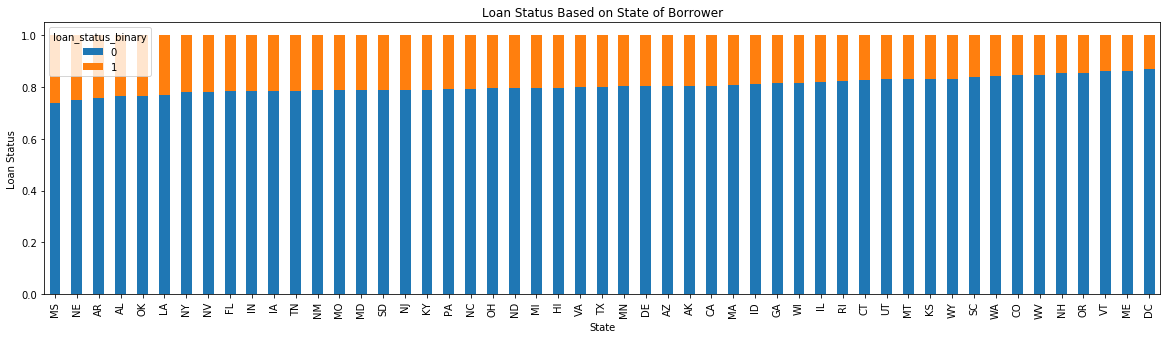

In [33]:
state = pd.crosstab(df.addr_state , df.loan_status_binary)
state = state.div(state.sum(1).astype(float), axis=0).sort_values(0)


state.plot(kind='bar', stacked=True, title='Loan Status Based on State of Borrower', figsize=(20,5))
plt.xlabel('State')
plt.ylabel('Loan Status')
# print(df.addr_state.value_counts())

In [34]:
#there are no obvious states that show higher default applicants 
#drop column on addr_state
df.drop(['addr_state'], axis=1, inplace=True)

On September 28th, 2012, LendingClub announced that, as opposed to its standard fractional investment business model, it would begin setting aside some loans that could only be purchased in their entirety–or as whole loans. LendingClub allows both institutional and retail investors to participate and claims to randomly select loans as whole or fractional without disenfranchsing either party. Several years later we can see that this still hold true and there is no significant difference between the defaults of a whole loan vs a fractional loan.  

https://www.lendacademy.com/lending-club-whole-loan-program-one-year-later/

Text(0, 0.5, 'Loan Status')

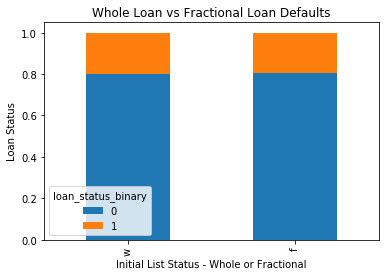

In [35]:
whole_fractional = pd.crosstab(df.initial_list_status , df.loan_status_binary)
whole_fractional = whole_fractional.div(whole_fractional.sum(1).astype(float),axis =0).sort_values(0)
whole_fractional.plot.bar(stacked = True, title = 'Whole Loan vs Fractional Loan Defaults')
plt.xlabel('Initial List Status - Whole or Fractional')
plt.ylabel('Loan Status')

In [36]:
# we can drop initial list status, lending club has claimed they randomly select applicants for whole or fractional and we
#see no obvious difference in the above chart. 
df.drop('initial_list_status', axis =1 , inplace = True)

Cash         1341199
DirectPay       6900
Name: disbursement_method, dtype: int64


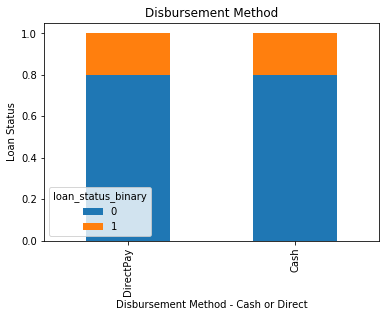

In [37]:
disbursement_method = pd.crosstab(df.disbursement_method , df.loan_status_binary)
disbursement_method = disbursement_method.div(disbursement_method.sum(1).astype(float),axis =0).sort_values(0)
disbursement_method.plot.bar(stacked = True, title = 'Disbursement Method')
plt.xlabel('Disbursement Method - Cash or Direct')
plt.ylabel('Loan Status')
print(df.disbursement_method.value_counts())

In [38]:
#no obvious difference between customers with different disbursement methods, and imbalanced class where most customers 
#disburse via cash, we will drop
df.drop(['disbursement_method'], axis=1, inplace=True)

#### Impute Missing Values

In [39]:
obj_cols = df.columns[df.dtypes==object]

#Imputer function
imputer = lambda x:x.fillna(x.value_counts().index[0]) 

#Impute dtype=object with most frequent value
df[obj_cols] = df[obj_cols].apply(imputer) 

#Impute the rest of df with median
df = df.fillna(df.median(axis=0)) 

In [40]:
len(df.columns)

61

In [41]:
missing_data(df)

,count,mean


#### Pickle cleaned dataframe

In [47]:
df.to_pickle('dfaccept_processed2')
df = pd.read_pickle('dfaccept_processed2')

In [48]:
df.loan_status_binary.value_counts()

0    1078739
1     269360
Name: loan_status_binary, dtype: int64

In [49]:
columns = list(df.columns.values)

In [53]:
len(columns)

61

In [55]:
columns[59]

'loan_status_binary'

In [56]:
#reorder the columns so its easier to select y-variable later
columns = list(df.columns.values)
temp = columns[0]
columns[0] = columns[59]
columns[59] = temp
df = df[columns]

In [57]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348099 entries, 0 to 1348098
Data columns (total 61 columns):
loan_status_binary            1348099 non-null int32
term                          1348099 non-null object
int_rate                      1348099 non-null float64
sub_grade                     1348099 non-null object
emp_length                    1348099 non-null float64
home_ownership                1348099 non-null object
annual_inc                    1348099 non-null float64
verification_status           1348099 non-null object
purpose                       1348099 non-null object
dti                           1348099 non-null float64
delinq_2yrs                   1348099 non-null float64
earliest_cr_line              1348099 non-null float64
inq_last_6mths                1348099 non-null float64
open_acc                      1348099 non-null float64
pub_rec                       1348099 non-null float64
revol_bal                     1348099 non-null float64
revol_util    

In [58]:
df.application_type.value_counts()

Individual    1322293
Joint App       25806
Name: application_type, dtype: int64

In [59]:
df.earliest_cr_line.head(5)

0     5601.0
1     6940.0
2     6696.0
3     7488.0
4    11384.0
Name: earliest_cr_line, dtype: float64

#### Dummify categorical variables

In [60]:
#Get categorical columns
cat_col = df.columns[df.dtypes==object] 

#Create dummy variables
df_dummy = pd.get_dummies(df[cat_col], drop_first = True) 

#Drop categorical columns already encoded
df.drop(cat_col, axis=1, inplace=True) 

#Join the dummy variables to original dataframe
df = df.join(df_dummy) 

In [61]:
df.shape

(1348099, 111)

In [62]:
df.to_pickle('dfaccept_processed3')
df = pd.read_pickle('dfaccept_processed3')

In [63]:
df.head(5)

,loan_status_binary,int_rate,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,loan_amnt,total_il_high_credit_limit,total_bc_limit,fico,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App
0,0,13.99,10.0,55000.0,5.91,0.0,5601.0,1.0,7.0,0.0,2765.0,29.7,13.0,4421.723917,0.0,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,3600.0,13734.0,2400.0,677.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,11.99,10.0,65000.0,16.06,1.0,6940.0,4.0,22.0,0.0,21470.0,19.2,38.0,25679.660000,0.0,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,24700.0,24667.0,79300.0,717.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,10.78,10.0,63000.0,10.78,0.0,6696.0,0.0,6.0,0.0,7869.0,56.2,18.0,22705.924294,0.0,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,20000.0,14877.0,6200.0,697.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,22.45,3.0,104433.0,25.37,1.0,7488.0,3.0,12.0,0.0,21929.0,64.5,35.0,11740.500000,0.0,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,10400.0,88097.0,20300.0,697.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,13.44,4.0,34000.0,10.20,0.0,11384.0,0.0,5.0,0.0,8822.0,68.4,6.0,13708.948530,0.0,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,5.0,0.0,2.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,11950.0,4000.0,9400.0,692.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### Shuffle dataframe

In [64]:
df = df.reindex(np.random.permutation(df.index))


In [65]:
df.head(5)

,loan_status_binary,int_rate,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,loan_amnt,total_il_high_credit_limit,total_bc_limit,fico,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App
955803,0,14.65,10.0,55000.0,13.97,0.0,7274.0,0.0,11.0,0.0,20263.0,59.9,14.0,25495.105517,0.0,0.0,0.0,80231.0,24100.0,6.0,7407.0,13552.0,59.9,0.0,0.0,129.0,164.0,8.0,5.0,0.0,13.0,16.0,0.0,3.0,4.0,7.0,7.0,7.0,13.0,5.0,11.0,0.0,0.0,0.0,2.0,98.0,66.7,0.0,0.0,112373.0,22837.0,18000.0,31681.0,33815.0,712.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
412998,0,29.69,3.0,49420.0,23.41,0.0,4658.0,0.0,11.0,0.0,5162.0,66.2,14.0,31802.879866,0.0,0.0,1127.0,33825.0,7800.0,6.0,3075.0,2638.0,66.2,0.0,0.0,123.0,44.0,12.0,12.0,1.0,12.0,11.0,0.0,7.0,7.0,8.0,5.0,7.0,8.0,7.0,11.0,0.0,0.0,0.0,2.0,100.0,28.6,0.0,0.0,43634.0,33825.0,25000.0,35834.0,7800.0,667.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
522702,0,5.32,10.0,85000.0,16.12,0.0,8462.0,0.0,13.0,0.0,1238.0,2.9,30.0,12883.610894,0.0,0.0,0.0,254306.0,42800.0,5.0,21192.0,21030.0,2.2,0.0,0.0,155.0,243.0,20.0,6.0,5.0,36.0,17.0,0.0,1.0,5.0,7.0,8.0,10.0,17.0,4.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,307416.0,46661.0,12000.0,52616.0,21500.0,832.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1077331,0,10.99,1.0,185000.0,18.70,0.0,5844.0,0.0,14.0,0.0,30315.0,71.0,34.0,13568.275336,0.0,0.0,0.0,165100.0,42700.0,8.0,11793.0,4889.0,79.7,0.0,0.0,166.0,126.0,11.0,11.0,2.0,11.0,7.0,0.0,3.0,4.0,5.0,19.0,9.0,13.0,6.0,14.0,0.0,0.0,0.0,1.0,97.1,50.0,0.0,0.0,202058.0,165100.0,12000.0,159358.0,24100.0,687.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
228399,0,12.69,2.0,80000.0,22.26,0.0,6512.0,0.0,12.0,0.0,3028.0,6.7,52.0,24021.440854,0.0,0.0,0.0,383711.0,45300.0,9.0,31976.0,41222.0,6.5,0.0,0.0,98.0,170.0,17.0,5.0,1.0,17.0,5.0,0.0,2.0,6.0,8.0,42.0,7.0,9.0,3.0,12.0,0.0,0.0,0.0,5.0,100.0,0.0,0.0,0.0,433301.0,383711.0,18000.0,388001.0,44100.0,787.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
df = df.reset_index(drop=True)

In [67]:
df.head(5)

,loan_status_binary,int_rate,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,loan_amnt,total_il_high_credit_limit,total_bc_limit,fico,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App
0,0,14.65,10.0,55000.0,13.97,0.0,7274.0,0.0,11.0,0.0,20263.0,59.9,14.0,25495.105517,0.0,0.0,0.0,80231.0,24100.0,6.0,7407.0,13552.0,59.9,0.0,0.0,129.0,164.0,8.0,5.0,0.0,13.0,16.0,0.0,3.0,4.0,7.0,7.0,7.0,13.0,5.0,11.0,0.0,0.0,0.0,2.0,98.0,66.7,0.0,0.0,112373.0,22837.0,18000.0,31681.0,33815.0,712.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,29.69,3.0,49420.0,23.41,0.0,4658.0,0.0,11.0,0.0,5162.0,66.2,14.0,31802.879866,0.0,0.0,1127.0,33825.0,7800.0,6.0,3075.0,2638.0,66.2,0.0,0.0,123.0,44.0,12.0,12.0,1.0,12.0,11.0,0.0,7.0,7.0,8.0,5.0,7.0,8.0,7.0,11.0,0.0,0.0,0.0,2.0,100.0,28.6,0.0,0.0,43634.0,33825.0,25000.0,35834.0,7800.0,667.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,5.32,10.0,85000.0,16.12,0.0,8462.0,0.0,13.0,0.0,1238.0,2.9,30.0,12883.610894,0.0,0.0,0.0,254306.0,42800.0,5.0,21192.0,21030.0,2.2,0.0,0.0,155.0,243.0,20.0,6.0,5.0,36.0,17.0,0.0,1.0,5.0,7.0,8.0,10.0,17.0,4.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,307416.0,46661.0,12000.0,52616.0,21500.0,832.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,10.99,1.0,185000.0,18.70,0.0,5844.0,0.0,14.0,0.0,30315.0,71.0,34.0,13568.275336,0.0,0.0,0.0,165100.0,42700.0,8.0,11793.0,4889.0,79.7,0.0,0.0,166.0,126.0,11.0,11.0,2.0,11.0,7.0,0.0,3.0,4.0,5.0,19.0,9.0,13.0,6.0,14.0,0.0,0.0,0.0,1.0,97.1,50.0,0.0,0.0,202058.0,165100.0,12000.0,159358.0,24100.0,687.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,12.69,2.0,80000.0,22.26,0.0,6512.0,0.0,12.0,0.0,3028.0,6.7,52.0,24021.440854,0.0,0.0,0.0,383711.0,45300.0,9.0,31976.0,41222.0,6.5,0.0,0.0,98.0,170.0,17.0,5.0,1.0,17.0,5.0,0.0,2.0,6.0,8.0,42.0,7.0,9.0,3.0,12.0,0.0,0.0,0.0,5.0,100.0,0.0,0.0,0.0,433301.0,383711.0,18000.0,388001.0,44100.0,787.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### Train Test Split

In [68]:
feat_labels = df.columns[1:]
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [69]:
y.value_counts()

0    1078739
1     269360
Name: loan_status_binary, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [77]:
X_test[['loan_amnt','total_pymnt']].head(5)

,loan_amnt,total_pymnt
676954,5300.0,5607.720000
793130,12000.0,12691.570001
370973,3600.0,3725.098988
810111,10000.0,660.540000
855808,26625.0,12081.260000


In [78]:
X_train[['loan_amnt','total_pymnt']].head(5)

,loan_amnt,total_pymnt
1232437,8000.0,9362.350263
1141654,24000.0,31293.333447
439035,15000.0,16133.288575
735312,8500.0,9424.990000
669084,25000.0,27167.279071


In [83]:
xtraintotalpayment=X_train['total_pymnt']

In [84]:
xtesttotalpayment=X_test['total_pymnt']

In [86]:
X_test.drop(['total_pymnt'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [87]:
X_train.drop(['total_pymnt'], axis=1, inplace=True)

In [110]:
X_train.to_pickle('xtrain')
X_test.to_pickle('xtest')
y_test.to_pickle('ytest')
y_train.to_pickle('ytrain')
xtraintotalpayment.to_pickle('xtraintp')
xtesttotalpayment.to_pickle('xtesttp')

 ### Models: Gridsearches and XGBoosts

In [92]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


In [93]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['loan_status_binary'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("Model Report")
    print("Best Iteration: {}".format(alg.get_booster().best_iteration))

    print ("Accuracy : %.4g" % accuracy_score(dtrain['loan_status_binary'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(dtrain['loan_status_binary'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [213]:
train = df[0:100000] #gridsearch on smaller portion of dataset to save time

In [214]:
target = 'loan_status_binary'

In [215]:
predictors = [x for x in train.columns if x not in [target]]

In [18]:
#to find starting point for n_estimator
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)


Model Report
Best Iteration: 182
Accuracy : 0.8168
AUC Score (Train): 0.786425


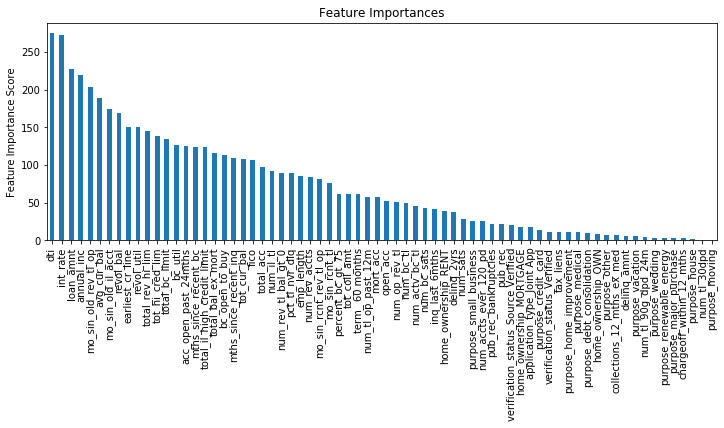

In [21]:
modelfit(xgb1, train, predictors)

In [ ]:
#best iteration was 182 where cv error didn't decrease in 50 rounds. 182 is now the new n_estimators for next few gridsearch

In [22]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=182, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_ 

({'mean_fit_time': array([ 32.68439751,  34.17466497,  36.03013434,  62.00634279,
          57.53335385,  53.97796721,  91.4874824 ,  86.91857491,
          81.75651979, 126.70624228, 116.10130868,  99.41147327]),
  'std_fit_time': array([ 0.44859433,  0.83974682,  0.74882268,  3.20882591,  2.24432   ,
          0.80990901,  3.60677656,  1.23506837,  3.54865275,  3.95879439,
          1.57552458, 11.08350717]),
  'mean_score_time': array([0.14520173, 0.17460051, 0.18720131, 0.2004004 , 0.17380157,
         0.22760639, 0.22359948, 0.22519994, 0.24520049, 0.31420016,
         0.2893991 , 0.25300164]),
  'std_score_time': array([0.01919721, 0.0268822 , 0.03693971, 0.03030962, 0.02585557,
         0.02091089, 0.01447169, 0.0140631 , 0.02871445, 0.03932071,
         0.01372014, 0.03650842]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False]

In [ ]:
#best parameters from previous grid search was max_depth 5 and min_child_weight 5, next gridsearch will be shortening the range around these

In [24]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=182, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([42.51139736, 43.029812  , 41.80461078, 54.18959875, 53.41679974,
         52.22019782, 66.22319798, 64.78639832, 55.52459745]),
  'std_fit_time': array([ 0.26794903,  0.3002346 ,  0.56568633,  1.22140309,  0.29776287,
          1.5462241 ,  1.46405619,  0.68472622, 12.14083911]),
  'mean_score_time': array([0.18100085, 0.1676012 , 0.16480355, 0.17699919, 0.19260035,
         0.19660101, 0.22700229, 0.18540063, 0.14920068]),
  'std_score_time': array([0.02443089, 0.02755789, 0.03605105, 0.02816365, 0.044704  ,
         0.03773818, 0.0247143 , 0.0162437 , 0.03513135]),
  'param_max_depth': masked_array(data=[4, 4, 4, 5, 5, 5, 6, 6, 6],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[4, 5, 6, 4, 5, 6, 4, 5, 6],
               mask=[False, False, False, False, False, False, False, False,
                    

In [ ]:
#best parameters from previous grid search was max_depth 5 and min_child_weight 4

In [25]:
#tuning gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=182, max_depth=4,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([28.44479938, 28.42079759, 27.92239895, 28.75099769, 24.85679889]),
  'std_fit_time': array([0.09690252, 0.46638673, 0.1553638 , 0.43820811, 8.1895007 ]),
  'mean_score_time': array([0.11540117, 0.10820084, 0.1279994 , 0.13140082, 0.1287991 ]),
  'std_score_time': array([0.01779681, 0.01233125, 0.04077533, 0.01964558, 0.03611963]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.71979551, 0.71979259, 0.71979259, 0.72017236, 0.72017166]),
  'split1_test_score': array([0.72106707, 0.72106707, 0.72106707, 0.72106707, 0.72106707]),
  'split2_test_score': array([0.71195185, 0.7122988 , 0.71219951, 0.71220291, 0.71221562]),
  'split3_test_score': array([0.72443558, 0.72443558, 0.72443558, 0.72443558, 0.724435

Model Report
Best Iteration: 197
Accuracy : 0.8117
AUC Score (Train): 0.757533


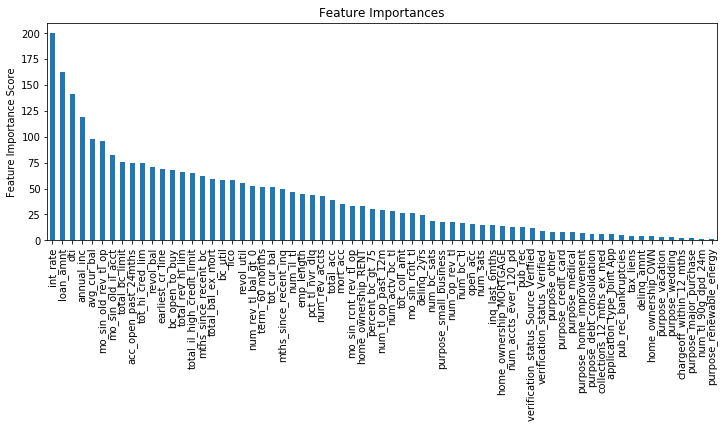

In [26]:
#recallibrate n_Estimators with gamma =0.1, max_depth=4, min_child_weight=4

xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=5,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)

In [ ]:
#n_estimators is 188 from above

In [27]:
#tune subsample and colsample_bytree
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=197, max_depth=4,
 min_child_weight=5, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([26.2159081 , 27.04332705, 27.13972983, 26.39454675, 31.70602622,
         30.7324245 , 29.95699782, 29.18339977, 35.26619782, 34.51340098,
         33.55126877, 32.79502225, 38.99699826, 38.32541156, 36.8442255 ,
         36.12720551]),
  'std_fit_time': array([0.4027315 , 0.60976024, 0.37277625, 0.25089224, 0.36114796,
         0.27960036, 0.13918149, 0.33330834, 0.33983903, 0.23159468,
         0.47877297, 0.16262984, 0.23805251, 0.86897233, 0.04854931,
         0.22204419]),
  'mean_score_time': array([0.12559881, 0.13820133, 0.14639854, 0.13499932, 0.1460012 ,
         0.13680801, 0.13860064, 0.16300011, 0.14380131, 0.13100014,
         0.14020061, 0.1400013 , 0.163201  , 0.12120295, 0.15160041,
         0.12119994]),
  'std_score_time': array([0.02692717, 0.02323234, 0.0191049 , 0.02288311, 0.017618  ,
         0.01424397, 0.02224941, 0.03864121, 0.00982569, 0.01547875,
         0.01908349, 0.01645617, 0.01714117, 0.02241647, 0.02614381,
         0.024424

In [28]:
#turning around results for colsample_bytree and subsample
param_test5 = {
 'subsample':[i/100.0 for i in range(85,95,5)],
 'colsample_bytree':[i/100.0 for i in range(75,85,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=197, max_depth=4,
 min_child_weight=5, gamma=0.1, subsample=0.7, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([31.05453162, 31.69960861, 33.13882647, 32.78660412]),
  'std_fit_time': array([0.18594715, 0.60185338, 0.29271225, 0.16462154]),
  'mean_score_time': array([0.12060113, 0.14340053, 0.14860091, 0.10560012]),
  'std_score_time': array([0.01463635, 0.01819437, 0.01433451, 0.01103713]),
  'param_colsample_bytree': masked_array(data=[0.75, 0.75, 0.8, 0.8],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.85, 0.9, 0.85, 0.9],
               mask=[False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'colsample_bytree': 0.75, 'subsample': 0.85},
   {'colsample_bytree': 0.75, 'subsample': 0.9},
   {'colsample_bytree': 0.8, 'subsample': 0.85},
   {'colsample_bytree': 0.8, 'subsample': 0.9}],
  'split0_test_score': array([0.71959464, 0.71966355, 0.719829  , 0.71966468]),
  'split1_test_score': array([0.7205888 , 0.72214724, 0.720240

In [ ]:
#still 0.7

In [29]:
#tune reg_alpha
param_test6 = {
 'reg_alpha':[1e-5, 1e-2,0, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=197, max_depth=4,
 min_child_weight=5, gamma=0.1, subsample=0.9, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([32.7626008 , 32.78262506, 33.19302721, 33.27622313, 32.94382625,
         26.2035995 ]),
  'std_fit_time': array([0.15426688, 0.18587763, 0.2465401 , 0.14635252, 0.78424213,
         7.03304315]),
  'mean_score_time': array([0.15519838, 0.13080139, 0.15719976, 0.12559948, 0.13540063,
         0.13059959]),
  'std_score_time': array([0.0293148 , 0.02835786, 0.02840792, 0.01441624, 0.02612742,
         0.04463521]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0, 0.1, 1, 100],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.71966468, 0.7194785 , 0.71966468, 0.72019269, 0.7199416 ,
         0.71694703]),
  'split1_test_score': array([0.7228035 , 0.72094559, 0.72280349, 0.72200158, 0.72315288,
         0.721208

In [30]:
#tune reg_alpha
param_test7 = {
 'reg_alpha':[0.5, 1, 5, 25, 50 ]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=197, max_depth=4,
 min_child_weight=5, gamma=0.1, subsample=0.9, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(train[predictors],train[target])
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

({'mean_fit_time': array([32.84640536, 32.53982239, 33.2323185 , 33.58510375, 28.55428348]),
  'std_fit_time': array([0.23514119, 0.37977091, 0.09873939, 0.50869137, 9.54287611]),
  'mean_score_time': array([0.13399916, 0.13140011, 0.15440102, 0.16140013, 0.12979922]),
  'std_score_time': array([0.02667304, 0.01754485, 0.00978952, 0.01594569, 0.03422622]),
  'param_reg_alpha': masked_array(data=[0.5, 1, 5, 25, 50],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0.5},
   {'reg_alpha': 1},
   {'reg_alpha': 5},
   {'reg_alpha': 25},
   {'reg_alpha': 50}],
  'split0_test_score': array([0.71985455, 0.7199416 , 0.72104879, 0.72043554, 0.71966192]),
  'split1_test_score': array([0.72312818, 0.72315288, 0.72275205, 0.72410487, 0.72315507]),
  'split2_test_score': array([0.71107724, 0.71196955, 0.71261962, 0.71278431, 0.71143203]),
  'split3_test_score': array([0.72392535, 0.72456885, 0.72418611, 0.724231

Model Report
Best Iteration: 377
Accuracy : 0.8119
AUC Score (Train): 0.760675


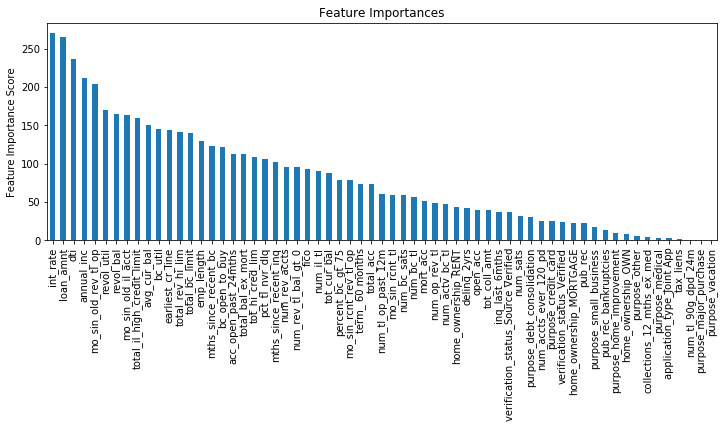

In [31]:
#using gridsearched parameters with higher n_estimators
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=5,
 gamma=0.1,
 subsample=0.9,
 colsample_bytree=0.8,
 reg_alpha=25,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train, predictors)

In [98]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=5,
 gamma=0.1,
 subsample=0.9,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

Model Report
Best Iteration: 2406
Accuracy : 0.8131
AUC Score (Train): 0.765660


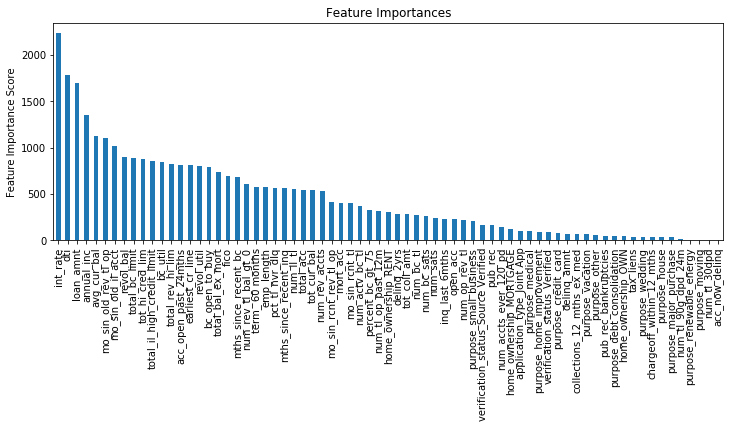

In [32]:

xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=5,
 gamma=0.1,
 subsample=0.9,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, train, predictors)

In [99]:
xgb5 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

Model Report
Best Iteration: 1992
Accuracy : 0.8177
AUC Score (Train): 0.793892


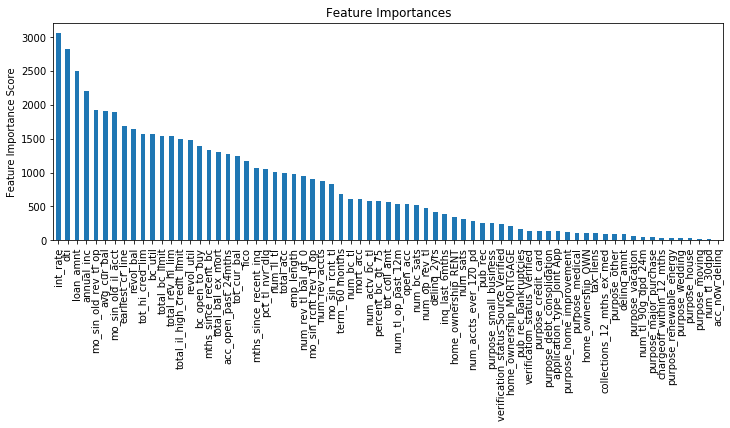

In [33]:
xgb5 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb5, train, predictors)

In [94]:
def draw_ConfusionMatrix(conf_matrix, classifier_name):
    ''' The confusion matrix draw function'''
    fig, ax = plt.subplots(figsize=(4.5, 4.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Greens, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')

    plt.title('Confusion Matrix for %s' % classifier_name)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()

In [95]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from scipy import interp

In [96]:
def run_cv(X, y, classifier, clf_name):
    
    #Construct a kfolds object
    kf = KFold(n_splits=5,shuffle=True)
    
    accuracy_scores = []
            
    #Initialize ROC variables
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    
    clf = classifier
    
    y_pred_full = y.copy()
    
    #Iterate through folds
    for i,(train_index, test_index) in enumerate(kf.split(y)):
        
        #Obtain the training and validation data sets for each fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train = y.iloc[train_index]
        y_test = y.iloc[test_index]
                
        #Train the classifier on the training data
        clf_fit = clf.fit(X_train,y_train)
        
        #Obtain a prediction on the test set
        y_pred = clf_fit.predict(X_test)
        
        #Map the prediction for this fold to the full dataset
        y_pred_full.iloc[test_index] = y_pred
    
        #Calculate the accuracy of the prediction on current fold
        accuracy_scores.append(accuracy_score(y_true=y_test, y_pred=y_pred))
        
        #Get probabilities and compute area under ROC curve
        probas_ = clf_fit.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    
    #Get Evaluation metrics    
    #Draw ROC Curve    
    mean_tpr /= len(y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    
    plt.plot([0, 1], 
             [0, 1], 
             '--', 
             color=(0.6, 0.6, 0.6), 
             label='Luck')
    
    plt.plot([0, 0, 1], 
             [0, 1, 1], 
             lw=2,
             linestyle=':',
             color='black',
             label='Perfect Performance')
    
    plt.plot(mean_fpr, 
             mean_tpr, 
             'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for %s' % classifier_name)
    plt.legend(loc="lower right")
    #plt.tight_layout()
    plt.show()
    
    #Accuracy score
    mean = np.mean(accuracy_scores)
    std = np.std(accuracy_scores)
    print(clf_name + ':' + '\n' + 'cross-validation accuracy')
    print("%.2f +/- %.3f" % (mean, std))
    print(classification_report(y, y_pred_full))
    
    #Confusion Matrix
    conf_matrix = confusion_matrix(y_true=y, y_pred=y_pred_full)
    draw_ConfusionMatrix(conf_matrix, clf_name)
    
    return clf_fit

0.8064564943253468
              precision    recall  f1-score   support

           0       0.81      0.98      0.89    269799
           1       0.59      0.10      0.17     67226

    accuracy                           0.81    337025
   macro avg       0.70      0.54      0.53    337025
weighted avg       0.77      0.81      0.75    337025



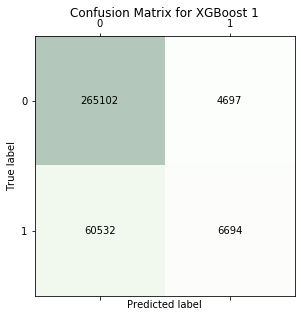

In [100]:
clf_name = 'XGBoost 1'
clf = xgb4

#Train the classifier on the training data
clf_fit = clf.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred = clf_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
draw_ConfusionMatrix(conf_matrix, clf_name)

In [115]:
pd.DataFrame(y_pred).to_pickle('ypred')

In [124]:
xtesttotalpayment.head(5)

676954     5607.720000
793130    12691.570001
370973     3725.098988
810111      660.540000
855808    12081.260000
Name: total_pymnt, dtype: float64

In [125]:
X_test.head(5)

,int_rate,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,loan_amnt,total_il_high_credit_limit,total_bc_limit,fico,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App
676954,8.39,1.0,100000.0,9.62,1.0,10745.0,0.0,16.0,0.0,9791.0,36.7,34.0,0.0,0.0,0.0,160193.0,26686.0,3.0,11442.0,5660.0,62.0,0.0,0.0,54.0,319.0,9.0,9.0,2.0,44.0,11.0,0.0,5.0,6.0,11.0,3.0,14.0,28.0,7.0,16.0,0.0,0.0,0.0,2.0,82.4,33.3,0.0,0.0,193369.0,21362.0,5300.0,0.0,14900.0,667.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
793130,9.16,10.0,47000.0,28.52,0.0,8523.0,0.0,10.0,1.0,8269.0,55.5,20.0,0.0,0.0,0.0,36178.0,14900.0,3.0,3618.0,201.0,96.6,0.0,0.0,152.0,246.0,15.0,14.0,0.0,67.0,20.0,0.0,2.0,2.0,2.0,10.0,6.0,10.0,6.0,10.0,0.0,0.0,0.0,0.0,100.0,100.0,1.0,0.0,68073.0,36178.0,12000.0,53173.0,6000.0,672.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
370973,9.92,10.0,108000.0,5.98,1.0,5997.0,0.0,4.0,0.0,1938.0,29.8,12.0,0.0,0.0,316.0,346910.0,6500.0,3.0,86728.0,3062.0,38.8,0.0,0.0,75.0,131.0,7.0,5.0,4.0,7.0,7.0,0.0,1.0,1.0,4.0,3.0,2.0,5.0,1.0,4.0,0.0,0.0,0.0,2.0,75.0,0.0,0.0,0.0,359122.0,27483.0,3600.0,31092.0,5000.0,677.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
810111,11.99,3.0,68000.0,12.44,0.0,3713.0,0.0,7.0,0.0,4566.0,31.5,13.0,0.0,0.0,94.0,140951.0,14500.0,5.0,20136.0,9534.0,32.4,0.0,0.0,99.0,109.0,15.0,15.0,1.0,18.0,20.0,0.0,4.0,4.0,4.0,4.0,5.0,8.0,4.0,7.0,0.0,0.0,0.0,0.0,100.0,25.0,0.0,0.0,165369.0,25184.0,10000.0,25869.0,14100.0,722.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
855808,25.69,3.0,74000.0,1.83,0.0,5235.0,0.0,2.0,0.0,4728.0,43.0,10.0,0.0,0.0,0.0,4728.0,11000.0,0.0,2364.0,272.0,94.6,0.0,0.0,143.0,122.0,53.0,53.0,1.0,73.0,0.0,0.0,1.0,1.0,3.0,5.0,2.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,11000.0,4728.0,26625.0,0.0,5000.0,717.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
pd.DataFrame(y_pred).head(5)

,0
0,0
1,0
2,0
3,0
4,0


In [128]:
pd.DataFrame(y_test).head(5)

,loan_status_binary
676954,0
793130,0
370973,0
810111,1
855808,1


In [129]:
a = pd.concat([X_test.reset_index(drop = True),pd.DataFrame(xtesttotalpayment).reset_index(drop = True),pd.DataFrame(y_pred).reset_index(drop = True),pd.DataFrame(y_test).reset_index(drop = True)],1)

In [131]:
a.head(5)

,int_rate,emp_length,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,loan_amnt,total_il_high_credit_limit,total_bc_limit,fico,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App,total_pymnt,0,loan_status_binary
0,8.39,1.0,100000.0,9.62,1.0,10745.0,0.0,16.0,0.0,9791.0,36.7,34.0,0.0,0.0,0.0,160193.0,26686.0,3.0,11442.0,5660.0,62.0,0.0,0.0,54.0,319.0,9.0,9.0,2.0,44.0,11.0,0.0,5.0,6.0,11.0,3.0,14.0,28.0,7.0,16.0,0.0,0.0,0.0,2.0,82.4,33.3,0.0,0.0,193369.0,21362.0,5300.0,0.0,14900.0,667.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5607.720000,0,0
1,9.16,10.0,47000.0,28.52,0.0,8523.0,0.0,10.0,1.0,8269.0,55.5,20.0,0.0,0.0,0.0,36178.0,14900.0,3.0,3618.0,201.0,96.6,0.0,0.0,152.0,246.0,15.0,14.0,0.0,67.0,20.0,0.0,2.0,2.0,2.0,10.0,6.0,10.0,6.0,10.0,0.0,0.0,0.0,0.0,100.0,100.0,1.0,0.0,68073.0,36178.0,12000.0,53173.0,6000.0,672.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,12691.570001,0,0
2,9.92,10.0,108000.0,5.98,1.0,5997.0,0.0,4.0,0.0,1938.0,29.8,12.0,0.0,0.0,316.0,346910.0,6500.0,3.0,86728.0,3062.0,38.8,0.0,0.0,75.0,131.0,7.0,5.0,4.0,7.0,7.0,0.0,1.0,1.0,4.0,3.0,2.0,5.0,1.0,4.0,0.0,0.0,0.0,2.0,75.0,0.0,0.0,0.0,359122.0,27483.0,3600.0,31092.0,5000.0,677.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3725.098988,0,0
3,11.99,3.0,68000.0,12.44,0.0,3713.0,0.0,7.0,0.0,4566.0,31.5,13.0,0.0,0.0,94.0,140951.0,14500.0,5.0,20136.0,9534.0,32.4,0.0,0.0,99.0,109.0,15.0,15.0,1.0,18.0,20.0,0.0,4.0,4.0,4.0,4.0,5.0,8.0,4.0,7.0,0.0,0.0,0.0,0.0,100.0,25.0,0.0,0.0,165369.0,25184.0,10000.0,25869.0,14100.0,722.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,660.540000,0,1
4,25.69,3.0,74000.0,1.83,0.0,5235.0,0.0,2.0,0.0,4728.0,43.0,10.0,0.0,0.0,0.0,4728.0,11000.0,0.0,2364.0,272.0,94.6,0.0,0.0,143.0,122.0,53.0,53.0,1.0,73.0,0.0,0.0,1.0,1.0,3.0,5.0,2.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,11000.0,4728.0,26625.0,0.0,5000.0,717.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,12081.260000,0,1


In [132]:
a = a.rename(columns = {0:'prediction'})

In [134]:
a = a[['loan_status_binary','prediction','loan_amnt','total_pymnt']]

In [135]:
a.head(5)

,loan_status_binary,prediction,loan_amnt,total_pymnt
0,0,0,5300.0,5607.720000
1,0,0,12000.0,12691.570001
2,0,0,3600.0,3725.098988
3,1,0,10000.0,660.540000
4,1,0,26625.0,12081.260000


In [136]:
a['int_collected'] = a['total_pymnt']-a['loan_amnt']

In [137]:
a.head(5)

,loan_status_binary,prediction,loan_amnt,total_pymnt,int_collected
0,0,0,5300.0,5607.720000,307.720000
1,0,0,12000.0,12691.570001,691.570001
2,0,0,3600.0,3725.098988,125.098988
3,1,0,10000.0,660.540000,-9339.460000
4,1,0,26625.0,12081.260000,-14543.740000


In [140]:
a1=a.groupby(['prediction','loan_status_binary']).agg({'loan_amnt':['sum','mean','count'],'total_pymnt':['sum','mean','count'],'int_collected':['sum','mean','count']}).round(2)

In [141]:
a1

loan_amnt                     total_pymnt  \
                                        sum      mean   count           sum   
prediction loan_status_binary                                                 
0          0                   3.719616e+09  14030.89  265102  4.320347e+09   
           1                   9.131730e+08  15085.79   60532  4.905268e+08   
1          0                   9.113905e+07  19403.67    4697  1.167432e+08   
           1                   1.305654e+08  19504.84    6694  6.421040e+07   

                                                int_collected                   
                                   mean   count           sum     mean   count  
prediction loan_status_binary                                                   
0          0                   16296.92  265102  6.007312e+08  2266.04  265102  
           1                    8103.59   60532 -4.226462e+08 -6982.19   60532  
1          0                   24854.85    4697  2.560417e+07  5451.18    4697  
           1                    9592.23    6694 -6.635498e+07 -9912.60    6694

In [142]:
a2=a.groupby(['prediction']).agg({'loan_amnt':['sum','mean','count'],'total_pymnt':['sum','mean','count'],'int_collected':['sum','mean','count']}).round(2)

In [143]:
a2

loan_amnt                     total_pymnt                    \
                     sum      mean   count           sum      mean   count   
prediction                                                                   
0           4.632789e+09  14226.98  325634  4.810874e+09  14773.87  325634   
1           2.217044e+08  19463.12   11391  1.809536e+08  15885.67   11391   

           int_collected                   
                     sum     mean   count  
prediction                                 
0           1.780850e+08   546.89  325634  
1          -4.075081e+07 -3577.46   11391

In [147]:
#principal needed
4.632789e+09

4632789000.0

In [148]:
#interest collected by model
1.780850e+08

178085000.0

In [154]:
#return, % interest collected divided by principal needed
round((((178085000.0)/(4632789000.0))*100),2)

3.84

0.8069371708330243
              precision    recall  f1-score   support

           0       0.81      0.98      0.89    269799
           1       0.59      0.11      0.18     67226

    accuracy                           0.81    337025
   macro avg       0.70      0.54      0.53    337025
weighted avg       0.77      0.81      0.75    337025



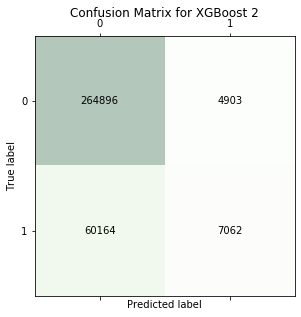

In [101]:
clf2_name = 'XGBoost 2'
clf2 = xgb5

#Train the classifier on the training data
clf2_fit = clf2.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred2 = clf2_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred2))
print(classification_report(y_test, y_pred2))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred2)
draw_ConfusionMatrix(conf_matrix, clf2_name)

In [ ]:
pd.DataFrame(y_pred2).to_pickle('ypred2')

In [155]:
b = pd.concat([X_test.reset_index(drop = True),pd.DataFrame(xtesttotalpayment).reset_index(drop = True),pd.DataFrame(y_pred2).reset_index(drop = True),pd.DataFrame(y_test).reset_index(drop = True)],1)

In [157]:
b = b.rename(columns = {0:'prediction'})

In [158]:
b = b[['loan_status_binary','prediction','loan_amnt','total_pymnt']]

In [159]:
b['int_collected'] = b['total_pymnt']-b['loan_amnt']

In [160]:
b1=b.groupby(['prediction','loan_status_binary']).agg({'loan_amnt':['sum','mean','count'],'total_pymnt':['sum','mean','count'],'int_collected':['sum','mean','count']}).round(2)

In [161]:
b1

loan_amnt                     total_pymnt  \
                                        sum      mean   count           sum   
prediction loan_status_binary                                                 
0          0                   3.715976e+09  14028.06  264896  4.316225e+09   
           1                   9.068035e+08  15072.19   60164  4.877797e+08   
1          0                   9.477830e+07  19330.68    4903  1.208656e+08   
           1                   1.369349e+08  19390.39    7062  6.695750e+07   

                                                int_collected                   
                                   mean   count           sum     mean   count  
prediction loan_status_binary                                                   
0          0                   16294.03  264896  6.002481e+08  2265.98  264896  
           1                    8107.50   60164 -4.190238e+08 -6964.69   60164  
1          0                   24651.36    4903  2.608732e+07  5320.69    4903  
           1                    9481.38    7062 -6.997740e+07 -9909.01    7062

In [162]:
b2=b.groupby(['prediction']).agg({'loan_amnt':['sum','mean','count'],'total_pymnt':['sum','mean','count'],'int_collected':['sum','mean','count']}).round(2)

In [163]:
b2

loan_amnt                     total_pymnt                    \
                     sum      mean   count           sum      mean   count   
prediction                                                                   
0           4.622780e+09  14221.31  325060  4.804004e+09  14778.82  325060   
1           2.317132e+08  19365.92   11965  1.878231e+08  15697.71   11965   

           int_collected                   
                     sum     mean   count  
prediction                                 
0           1.812243e+08   557.51  325060  
1          -4.389008e+07 -3668.21   11965

In [165]:
#principal needed
4.622780e+09

4622780000.0

In [166]:
#interest collected by model
1.812243e+08

181224300.0

In [167]:
#return, % interest collected divided by principal needed
round((((181224300.0)/(4622780000.0))*100),2)

3.92

In [102]:
xgb6 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=4,
 seed=27)


0.6645412061419776
              precision    recall  f1-score   support

           0       0.89      0.66      0.76    269799
           1       0.33      0.68      0.45     67226

    accuracy                           0.66    337025
   macro avg       0.61      0.67      0.60    337025
weighted avg       0.78      0.66      0.70    337025



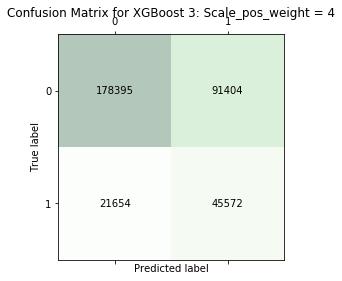

In [103]:
clf3_name = 'XGBoost 3: Scale_pos_weight = 4'
clf3 = xgb6

#Train the classifier on the training data
clf3_fit = clf3.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred3 = clf3_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred3))
print(classification_report(y_test, y_pred3))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred3)
draw_ConfusionMatrix(conf_matrix, clf3_name)

In [117]:
pd.DataFrame(y_pred3).to_pickle('ypred3')

In [168]:
c = pd.concat([X_test.reset_index(drop = True),pd.DataFrame(xtesttotalpayment).reset_index(drop = True),pd.DataFrame(y_pred3).reset_index(drop = True),pd.DataFrame(y_test).reset_index(drop = True)],1)
c = c.rename(columns = {0:'prediction'})
c = c[['loan_status_binary','prediction','loan_amnt','total_pymnt']]
c['int_collected'] = c['total_pymnt']-c['loan_amnt']
c1=c.groupby(['prediction','loan_status_binary']).agg({'loan_amnt':['sum','mean','count'],'total_pymnt':['sum','mean','count'],'int_collected':['sum','mean','count']}).round(2)
c2=c.groupby(['prediction']).agg({'loan_amnt':['sum','mean','count'],'total_pymnt':['sum','mean','count'],'int_collected':['sum','mean','count']}).round(2)

In [169]:
c1

loan_amnt                     total_pymnt  \
                                        sum      mean   count           sum   
prediction loan_status_binary                                                 
0          0                   2.354749e+09  13199.64  178395  2.660355e+09   
           1                   2.835842e+08  13096.16   21654  1.597813e+08   
1          0                   1.456006e+09  15929.34   91404  1.776736e+09   
           1                   7.601542e+08  16680.29   45572  3.949559e+08   

                                                int_collected                   
                                   mean   count           sum     mean   count  
prediction loan_status_binary                                                   
0          0                   14912.72  178395  3.056055e+08  1713.08  178395  
           1                    7378.83   21654 -1.238029e+08 -5717.32   21654  
1          0                   19438.27   91404  3.207299e+08  3508.93   91404  
           1                    8666.64   45572 -3.651983e+08 -8013.66   45572

In [170]:
c2

loan_amnt                     total_pymnt                    \
                     sum      mean   count           sum      mean   count   
prediction                                                                   
0           2.638333e+09  13188.44  200049  2.820136e+09  14097.23  200049   
1           2.216160e+09  16179.18  136976  2.171691e+09  15854.54  136976   

           int_collected                  
                     sum    mean   count  
prediction                                
0           1.818026e+08  908.79  200049  
1          -4.446842e+07 -324.64  136976

In [171]:
#principal needed (loan amount sum)
2.638333e+09

2638333000.0

In [173]:
#interest collected by model (int collected sum)
1.818026e+08

181802600.0

In [175]:
#return, % interest collected divided by principal needed
round((((181802600.0)/(2638333000.0))*100),2)

6.89

In [104]:
xgb7 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=8,
 seed=27)

0.47508048364364663
              precision    recall  f1-score   support

           0       0.93      0.37      0.53    269799
           1       0.26      0.89      0.40     67226

    accuracy                           0.48    337025
   macro avg       0.60      0.63      0.47    337025
weighted avg       0.80      0.48      0.51    337025



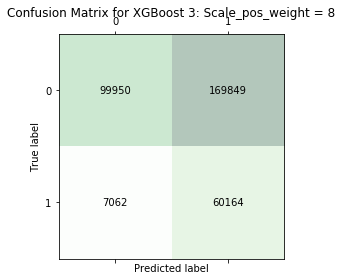

In [105]:
clf4_name = 'XGBoost 3: Scale_pos_weight = 8'
clf4 = xgb7

#Train the classifier on the training data
clf4_fit = clf4.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred4 = clf4_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred4))
print(classification_report(y_test, y_pred4))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred4)
draw_ConfusionMatrix(conf_matrix, clf4_name)

In [118]:
pd.DataFrame(y_pred4).to_pickle('ypred4')

In [177]:
d = pd.concat([X_test.reset_index(drop = True),pd.DataFrame(xtesttotalpayment).reset_index(drop = True),pd.DataFrame(y_pred4).reset_index(drop = True),pd.DataFrame(y_test).reset_index(drop = True)],1)
d = d.rename(columns = {0:'prediction'})
d = d[['loan_status_binary','prediction','loan_amnt','total_pymnt']]
d['int_collected'] = d['total_pymnt']-d['loan_amnt']
d1=d.groupby(['prediction','loan_status_binary']).agg({'loan_amnt':['sum','mean','count'],'total_pymnt':['sum','mean','count'],'int_collected':['sum','mean','count']}).round(2)
d2=d.groupby(['prediction']).agg({'loan_amnt':['sum','mean','count'],'total_pymnt':['sum','mean','count'],'int_collected':['sum','mean','count']}).round(2)

In [178]:
d1

loan_amnt                     total_pymnt  \
                                        sum      mean   count           sum   
prediction loan_status_binary                                                 
0          0                   1.322666e+09  13233.28   99950  1.464818e+09   
           1                   9.233728e+07  13075.23    7062  5.259262e+07   
1          0                   2.488089e+09  14648.83  169849  2.972272e+09   
           1                   9.514011e+08  15813.46   60164  5.021446e+08   

                                                int_collected                   
                                   mean   count           sum     mean   count  
prediction loan_status_binary                                                   
0          0                   14655.51   99950  1.421520e+08  1422.23   99950  
           1                    7447.27    7062 -3.974465e+07 -5627.96    7062  
1          0                   17499.50  169849  4.841834e+08  2850.67  169849  
           1                    8346.26   60164 -4.492565e+08 -7467.20   60164

In [179]:
d2

loan_amnt                     total_pymnt                    \
                     sum      mean   count           sum      mean   count   
prediction                                                                   
0           1.415003e+09  13222.85  107012  1.517411e+09  14179.82  107012   
1           3.439490e+09  14953.46  230013  3.474417e+09  15105.31  230013   

           int_collected                  
                     sum    mean   count  
prediction                                
0           1.024073e+08  956.97  107012  
1           3.492689e+07  151.85  230013

In [180]:
#principal needed (loan amount sum)
1.415003e+09

1415003000.0

In [181]:
#interest collected by model (int collected sum)
1.024073e+08

102407300.0

In [182]:
#return, % interest collected divided by principal needed
round((((102407300.0)/(1415003000.0))*100),2)

7.24

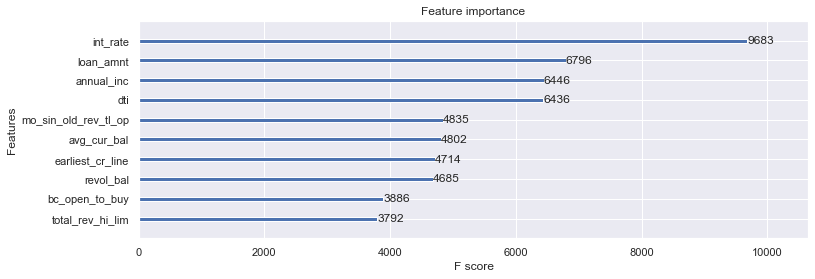

In [228]:
from xgboost import plot_importance
plot_importance(clf4, max_num_features=10) # top 10 most important features
plt.show()

In [106]:
xgb8 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=6,
 seed=27)

0.5555196202062161
              precision    recall  f1-score   support

           0       0.92      0.49      0.64    269799
           1       0.29      0.82      0.43     67226

    accuracy                           0.56    337025
   macro avg       0.60      0.66      0.53    337025
weighted avg       0.79      0.56      0.60    337025



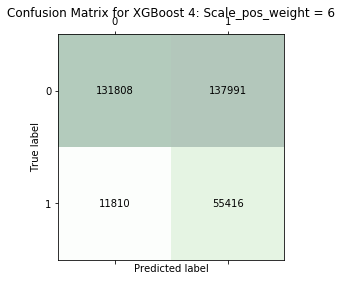

In [107]:
clf5_name = 'XGBoost 4: Scale_pos_weight = 6'
clf5 = xgb8

#Train the classifier on the training data
clf5_fit = clf5.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred5 = clf5_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred5))
print(classification_report(y_test, y_pred5))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred5)
draw_ConfusionMatrix(conf_matrix, clf5_name)

In [119]:
pd.DataFrame(y_pred5).to_pickle('ypred5')

In [183]:
e = pd.concat([X_test.reset_index(drop = True),pd.DataFrame(xtesttotalpayment).reset_index(drop = True),pd.DataFrame(y_pred5).reset_index(drop = True),pd.DataFrame(y_test).reset_index(drop = True)],1)
e = e.rename(columns = {0:'prediction'})
e = e[['loan_status_binary','prediction','loan_amnt','total_pymnt']]
e['int_collected'] = e['total_pymnt']-e['loan_amnt']
e1=e.groupby(['prediction','loan_status_binary']).agg({'loan_amnt':['sum','mean','count'],'total_pymnt':['sum','mean','count'],'int_collected':['sum','mean','count']}).round(2)
e2=e.groupby(['prediction']).agg({'loan_amnt':['sum','mean','count'],'total_pymnt':['sum','mean','count'],'int_collected':['sum','mean','count']}).round(2)

In [184]:
e1

loan_amnt                     total_pymnt  \
                                        sum      mean   count           sum   
prediction loan_status_binary                                                 
0          0                   1.730008e+09  13125.21  131808  1.931584e+09   
           1                   1.526232e+08  12923.21   11810  8.657877e+07   
1          0                   2.080747e+09  15078.86  137991  2.505507e+09   
           1                   8.911152e+08  16080.47   55416  4.681584e+08   

                                                int_collected                   
                                   mean   count           sum     mean   count  
prediction loan_status_binary                                                   
0          0                   14654.52  131808  2.015755e+08  1529.31  131808  
           1                    7330.97   11810 -6.604438e+07 -5592.24   11810  
1          0                   18157.03  137991  4.247599e+08  3078.17  137991  
           1                    8448.07   55416 -4.229568e+08 -7632.40   55416

In [185]:
e2

loan_amnt                     total_pymnt                    \
                     sum      mean   count           sum      mean   count   
prediction                                                                   
0           1.882631e+09  13108.60  143618  2.018162e+09  14052.29  143618   
1           2.971862e+09  15365.84  193407  2.973665e+09  15375.17  193407   

           int_collected                  
                     sum    mean   count  
prediction                                
0           1.355311e+08  943.69  143618  
1           1.803050e+06    9.32  193407

In [186]:
#principal needed (loan amount sum)
1.882631e+09

1882631000.0

In [187]:
#interest collected by model (int collected sum)
1.355311e+08

135531100.0

In [188]:
#return, % interest collected divided by principal needed
round((((135531100.0)/(1882631000.0))*100),2)

7.2

In [108]:
xgb9 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=10,
 seed=27)

0.4176752466434241
              precision    recall  f1-score   support

           0       0.94      0.29      0.44    269799
           1       0.25      0.93      0.39     67226

    accuracy                           0.42    337025
   macro avg       0.60      0.61      0.42    337025
weighted avg       0.81      0.42      0.43    337025



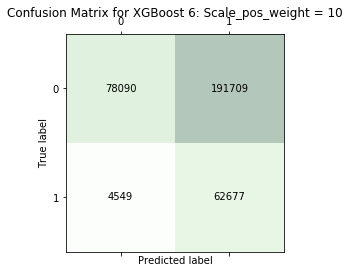

In [109]:
clf6_name = 'XGBoost 6: Scale_pos_weight = 10'
clf6 = xgb9

#Train the classifier on the training data
clf6_fit = clf6.fit(X_train,y_train)

#Obtain a prediction on the test set
y_pred6 = clf6_fit.predict(X_test)

#Calculate the accuracy of the prediction on current fold
print(accuracy_score(y_true=y_test, y_pred=y_pred6))
print(classification_report(y_test, y_pred6))

#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred6)
draw_ConfusionMatrix(conf_matrix, clf6_name)

In [120]:
pd.DataFrame(y_pred6).to_pickle('ypred6')

In [189]:
f = pd.concat([X_test.reset_index(drop = True),pd.DataFrame(xtesttotalpayment).reset_index(drop = True),pd.DataFrame(y_pred6).reset_index(drop = True),pd.DataFrame(y_test).reset_index(drop = True)],1)
f = f.rename(columns = {0:'prediction'})
f = f[['loan_status_binary','prediction','loan_amnt','total_pymnt']]
f['int_collected'] = f['total_pymnt']-f['loan_amnt']
f1=f.groupby(['prediction','loan_status_binary']).agg({'loan_amnt':['sum','mean','count'],'total_pymnt':['sum','mean','count'],'int_collected':['sum','mean','count']}).round(2)
f2=f.groupby(['prediction']).agg({'loan_amnt':['sum','mean','count'],'total_pymnt':['sum','mean','count'],'int_collected':['sum','mean','count']}).round(2)

In [190]:
f1

loan_amnt                     total_pymnt  \
                                        sum      mean   count           sum   
prediction loan_status_binary                                                 
0          0                   1.046967e+09  13407.19   78090  1.152482e+09   
           1                   6.091552e+07  13390.97    4549  3.480815e+07   
1          0                   2.763788e+09  14416.58  191709  3.284608e+09   
           1                   9.828228e+08  15680.76   62677  5.199290e+08   

                                                int_collected                   
                                   mean   count           sum     mean   count  
prediction loan_status_binary                                                   
0          0                   14758.39   78090  1.055153e+08  1351.20   78090  
           1                    7651.82    4549 -2.610738e+07 -5739.15    4549  
1          0                   17133.30  191709  5.208201e+08  2716.72  191709  
           1                    8295.37   62677 -4.628938e+08 -7385.39   62677

In [191]:
f2

loan_amnt                     total_pymnt                    \
                     sum      mean   count           sum      mean   count   
prediction                                                                   
0           1.107883e+09  13406.29   82639  1.187291e+09  14367.19   82639   
1           3.746610e+09  14728.05  254386  3.804537e+09  14955.76  254386   

           int_collected                  
                     sum    mean   count  
prediction                                
0            79407887.28  960.90   82639  
1            57926306.81  227.71  254386

In [192]:
#principal needed (loan amount sum)
1.107883e+09

1107883000.0

In [193]:
#interest collected by model (int collected sum)
79407887.28

79407887.28

In [194]:
#return, % interest collected divided by principal needed
round((((79407887.28)/(1107883000.0))*100),2)

7.17

In [198]:
np.array([[1107883000.0, 1882631000.0, 1415003000.0,2638333000.0,4622780000.0],[79407887.28,135531100.0,102407300.0,181802600.0,181224300.0], [7.17, 7.2, 7.24,6.89,3.92]])


array([[1.10788300e+09, 1.88263100e+09, 1.41500300e+09, 2.63833300e+09,
        4.62278000e+09],
       [7.94078873e+07, 1.35531100e+08, 1.02407300e+08, 1.81802600e+08,
        1.81224300e+08],
       [7.17000000e+00, 7.20000000e+00, 7.24000000e+00, 6.89000000e+00,
        3.92000000e+00]])

In [202]:
graph = {'Total Principal Required': [1107883000.0, 1882631000.0, 1415003000.0,2638333000.0,4622780000.0], 'Total Interest Collected': [79407887.28,135531100.0,102407300.0,181802600.0,181224300.0], 'Percent Return on Total Principal':[7.17, 7.2, 7.24,6.89,3.92]}
graphdf = pd.DataFrame(data=graph)

In [203]:
graphdf

,Total Principal Required,Total Interest Collected,Percent Return on Total Principal
0,1.107883e+09,7.940789e+07,7.17
1,1.882631e+09,1.355311e+08,7.20
2,1.415003e+09,1.024073e+08,7.24
3,2.638333e+09,1.818026e+08,6.89
4,4.622780e+09,1.812243e+08,3.92


In [208]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

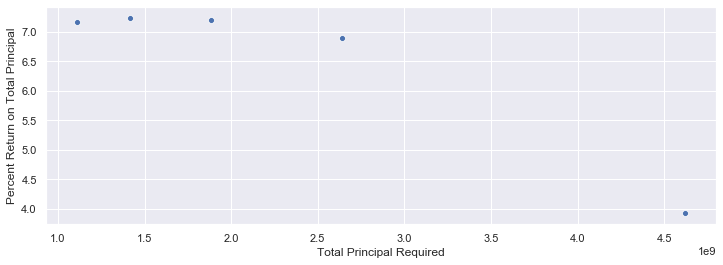

In [209]:
sns.scatterplot(x="Total Principal Required",y="Percent Return on Total Principal",data=graphdf)

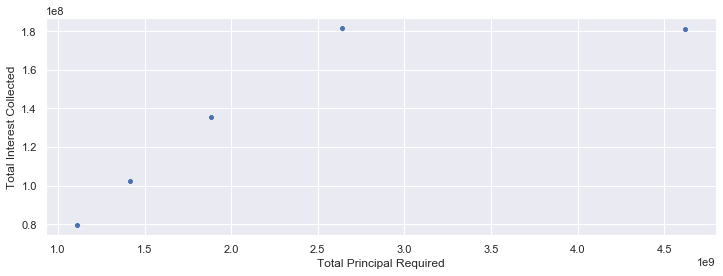

In [210]:
sns.scatterplot(x="Total Principal Required",y="Total Interest Collected",data=graphdf)